In [4]:
!pip install deepxde

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.4/184.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 8.7 MB/s eta 0:00:00


**THIS IS IMPORTANT FOR CODES TO RUN**

# **REGRESSION PROBLEM USING TF**

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 19939.9961 - mae: 107.8961 - val_loss: 19005.3047 - val_mae: 103.6335
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18333.0957 - mae: 103.1822 - val_loss: 18308.1367 - val_mae: 101.3149
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17798.0000 - mae: 101.2023 - val_loss: 17073.6953 - val_mae: 97.0741
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17532.3047 - mae: 100.6599 - val_loss: 15031.2822 - val_mae: 89.6864
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14584.8984 - mae: 89.1986 - val_loss: 12107.6387 - val_mae: 78.3711
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12060.0576 - mae: 79.0290 - val_loss: 8556.4043 - val_mae: 63.6360
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7346.7876 - mae: 60.2181 - val_loss: 5122.1377 - val_mae: 49.1031
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4870.3130 - mae: 49.0904 - val_loss: 2686.9116 - 

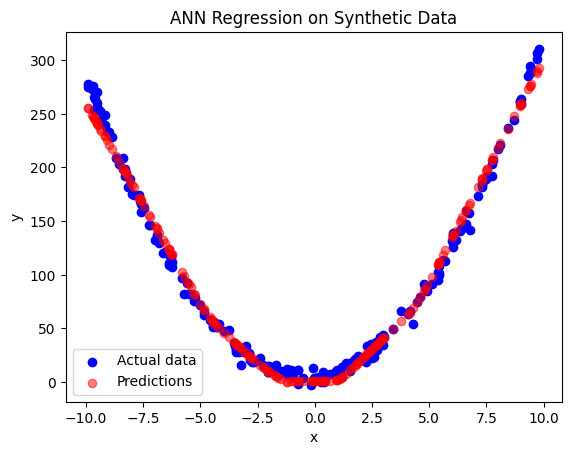

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Generate the dataset
np.random.seed(42)  # Set a seed for reproducibility
x = np.random.uniform(-10, 10, 1000)  # Generate 1000 random samples uniformly from [-10, 10]
y = 3 * x**2 + 2 * x + 5 + np.random.normal(0, 5, x.shape)  # Quadratic equation with added Gaussian noise

# Reshape the data to make it compatible with the neural network input/output
x = x.reshape(-1, 1)  # x as a column vector
y = y.reshape(-1, 1)  # y as a column vector

# Split the dataset into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 2: Define the ANN model for regression
# Sequential model consists of layers stacked sequentially
model = Sequential([
    Dense(64, input_dim=1, activation='relu'),   # First hidden layer with 64 neurons and ReLU activation
    Dense(32, activation='relu'),                # Second hidden layer with 32 neurons and ReLU activation
    Dense(1)                                     # Output layer with 1 neuron (no activation for regression)
])

# Step 3: Compile the model
# Define the optimizer, loss function, and evaluation metrics
model.compile(
    optimizer='adam',       # Adam optimizer for adaptive learning
    loss='mse',             # Mean Squared Error as the loss function for regression
    metrics=['mae']         # Mean Absolute Error as an additional metric for evaluation
)

# Step 4: Train the model
# Fit the model on the training data, using the test data for validation
history = model.fit(
    x_train, y_train,                   # Training data
    validation_data=(x_test, y_test),   # Validation data
    epochs=100,                         # Number of training epochs
    batch_size=32,                      # Number of samples per gradient update
    verbose=1                           # Print training progress
)

# Step 5: Evaluate the model
# Evaluate the trained model on the test data
loss, mae = model.evaluate(x_test, y_test, verbose=0)
print(f"Mean Absolute Error on Test Data: {mae:.2f}")  # Print the test MAE for interpretation

# Step 6: Plotting the model's predictions
# Use the trained model to predict the output for test data
predictions = model.predict(x_test)

# Create a scatter plot to visualize actual vs predicted values
plt.scatter(x_test, y_test, color="blue", label="Actual data")  # Blue points for actual data
plt.scatter(x_test, predictions, color="red", alpha=0.5, label="Predictions")  # Red points for predictions
plt.xlabel("x")        # Label for x-axis
plt.ylabel("y")        # Label for y-axis
plt.legend()           # Add a legend to distinguish actual vs predicted points
plt.title("ANN Regression on Synthetic Data")  # Title for the plot
plt.show()             # Display the plot

# HARMONIC OSCILLATOR(SINE AND COSINE FUNCTIONS)

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


No backend selected.
Finding available backend...
Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)
Compiling model...
Building feed-forward neural network...
'build' took 0.071653 s

'compile' took 0.450401 s

Training model...

Step      Train loss                                  Test loss                                   Test metric   
0         [1.25e-02, 5.99e-03, 0.00e+00, 1.00e+00]    [1.21e-02, 5.73e-03, 0.00e+00, 1.00e+00]    [1.02e+00]    
1000      [8.12e-03, 6.39e-03, 3.54e-08, 2.51e-04]    [9.05e-03, 6.49e-03, 3.54e-08, 2.51e-04]    [7.53e-01]    
2000      [5.53e-03, 4.58e-03, 4.72e-07, 1.30e-04]    [5.84e-03, 4.87e-03, 4.72e-07, 1.30e-04]    [6.26e-01]    
3000      [3.01e-03, 6.24e-03, 1.03e-05, 1.66e-04]    [3.12e-03, 6.67e-03, 1.03e-05, 1.66e-04] 

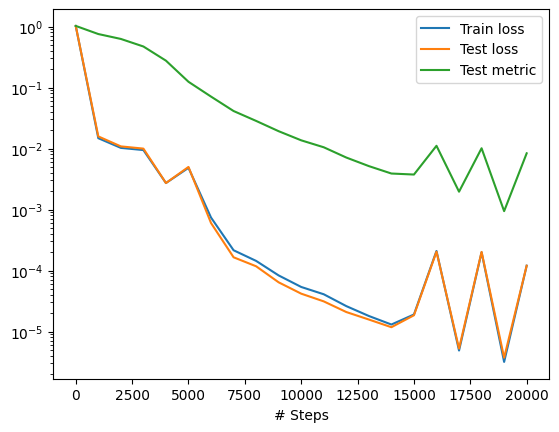

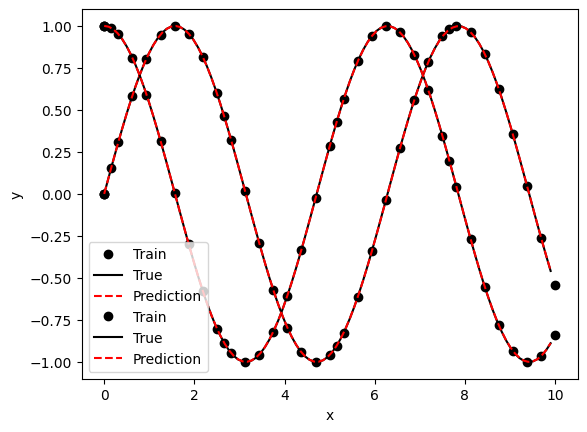

In [5]:
import deepxde as dde
import numpy as np
# Define the time domain for the problem, which ranges from 0 to 10
geom = dde.geometry.TimeDomain(0, 10)
# Define the ODE system representing the relationships between y1 and y2
def ode_system(x, y):
    # Separate y into its components y1 and y2
    y1, y2 = y[:, 0:1], y[:, 1:]
    # Compute the derivatives of y1 and y2 with respect to x
    dy1_x = dde.grad.jacobian(y, x, i=0)
    dy2_x = dde.grad.jacobian(y, x, i=1)
    # Return the ODEs as a list of expressions
    return [dy1_x - y2, dy2_x + y1]
# Define the boundary conditions
# The boundary condition function checks if x is at the initial point (x=0)
def boundary(_, on_initial):
    return on_initial
# Define initial conditions for y1 and y2 at x = 0
ic1 = dde.icbc.IC(geom, lambda x: 0, boundary, component=0)  # y1(0) = 0
ic2 = dde.icbc.IC(geom, lambda x: 1, boundary, component=1)  # y2(0) = 1
# Define the true solution for comparison and error calculation during training
def func(x):
    return np.hstack((np.sin(x), np.cos(x)))
# Set up the data for the problem using DeepXDE's PDE data structure
data = dde.data.PDE(
    geom,               # Geometry (time domain)
    ode_system,         # The ODE system function
    [ic1, ic2],         # Initial conditions
    num_domain=35,      # Number of training points in the domain
    num_boundary=2,     # Number of training points on the boundary
    solution=func,      # True solution (optional)
    num_test=100        # Number of test points for validation
)
# Define the neural network structure
layer_size = [1] + [50] * 3 + [2]  # Input layer + three hidden layers of 50 nodes + output layer
activation = "tanh"                # Activation function
initializer = "Glorot uniform"     # Weight initializer
net = dde.nn.FNN(layer_size, activation, initializer)
# Set up the model using the data and neural network
model = dde.Model(data, net)
# Compile the model with the Adam optimizer, learning rate, and a metric for error
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
# Train the model for 20,000 iterations and save the loss history and training state
losshistory, train_state = model.train(iterations=20000)
# Plot and save the loss history and training results
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# **DAMPED HARMONIC OSCILLATOR**

Compiling model...
Building feed-forward neural network...
'build' took 0.106897 s

'compile' took 0.779761 s

Training model...

Step      Train loss                                  Test loss                                   Test metric
0         [1.25e-02, 8.33e-03, 1.00e+00, 0.00e+00]    [1.21e-02, 8.19e-03, 1.00e+00, 0.00e+00]    []  
1000      [4.12e-03, 4.86e-03, 1.11e-04, 1.86e-06]    [4.08e-03, 5.37e-03, 1.11e-04, 1.86e-06]    []  
2000      [1.79e-03, 2.14e-03, 2.87e-05, 4.73e-07]    [1.88e-03, 2.16e-03, 2.87e-05, 4.73e-07]    []  
3000      [1.12e-03, 7.69e-04, 7.12e-06, 3.12e-08]    [1.13e-03, 7.64e-04, 7.12e-06, 3.12e-08]    []  
4000      [7.09e-04, 3.27e-04, 2.50e-06, 7.36e-08]    [6.60e-04, 3.37e-04, 2.50e-06, 7.36e-08]    []  
5000      [2.24e-04, 1.32e-04, 6.39e-07, 1.95e-08]    [1.85e-04, 1.41e-04, 6.39e-07, 1.95e-08]    []  
6000      [6.83e-05, 6.59e-05, 2.07e-07, 1.85e-08]    [4.75e-05, 6.95e-05, 2.07e-07, 1.85e-08]    []  
7000      [6.48e-05, 5.71e-05, 3.72e-06

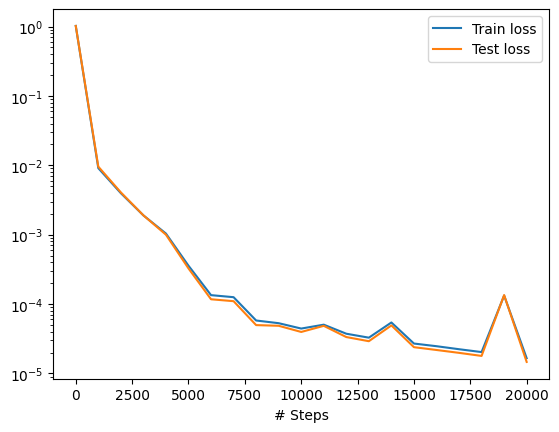

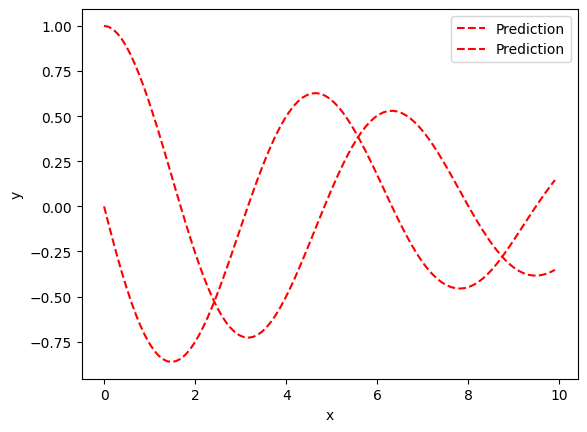

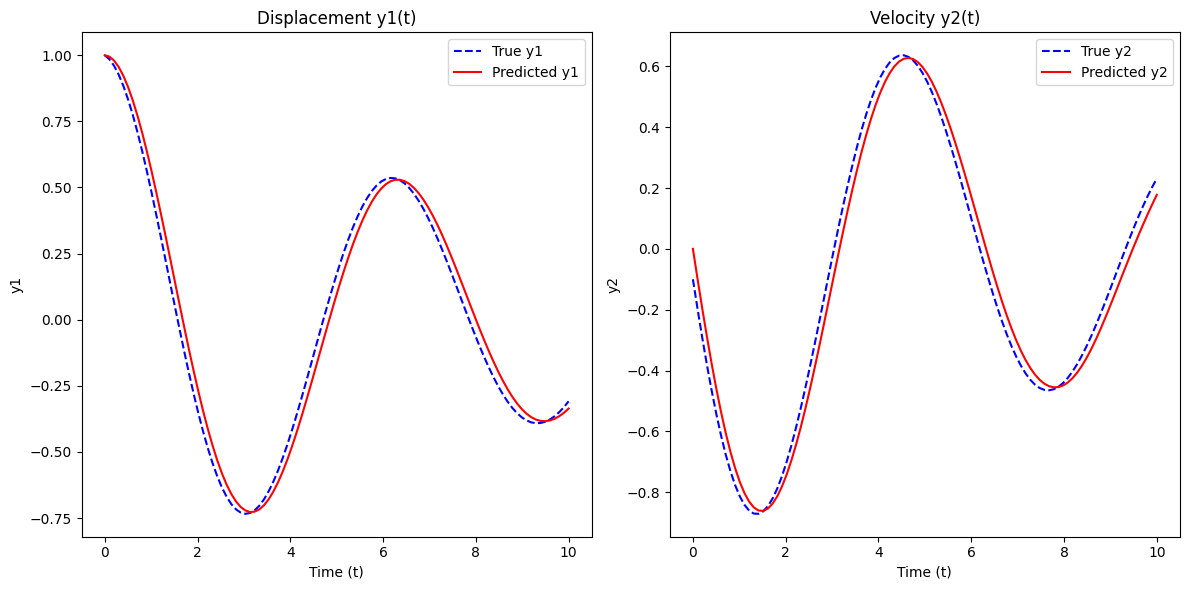

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters for the damped oscillator
gamma = 0.1  # Damping coefficient
omega = 1.0  # Natural frequency

# Define the time domain from t=0 to t=10
geom = dde.geometry.TimeDomain(0, 10)

# Define the system of ODEs for the damped harmonic oscillator
def ode_system(x, y):
    # Separate y into its components y1 and y2
    y1, y2 = y[:, 0:1], y[:, 1:]
    # Compute the derivatives of y1 and y2 with respect to t
    dy1_t = dde.grad.jacobian(y, x, i=0)
    dy2_t = dde.grad.jacobian(y, x, i=1)
    # Return the ODEs as a list of expressions
    return [dy1_t - y2, dy2_t + 2 * gamma * y2 + omega**2 * y1]

# Define the boundary condition at t=0 (initial conditions)
def boundary(_, on_initial):
    return on_initial

# Initial conditions for y1(0) = 1 and y2(0) = 0
ic1 = dde.icbc.IC(geom, lambda x: 1, boundary, component=0)  # y1(0) = 1
ic2 = dde.icbc.IC(geom, lambda x: 0, boundary, component=1)  # y2(0) = 0

# Set up the data for the problem using DeepXDE's PDE data structure
data = dde.data.PDE(
    geom,               # Geometry (time domain)
    ode_system,         # The ODE system function
    [ic1, ic2],         # Initial conditions
    num_domain=35,      # Number of training points in the domain
    num_boundary=2,     # Number of training points on the boundary
    num_test=100        # Number of test points for validation
)

# Define the neural network structure
layer_size = [1] + [50] * 3 + [2]  # Input layer + three hidden layers of 50 nodes + output layer
activation = "tanh"                # Activation function
initializer = "Glorot uniform"     # Weight initializer
net = dde.nn.FNN(layer_size, activation, initializer)

# Set up the model using the data and neural network
model = dde.Model(data, net)

# Compile the model with the Adam optimizer, learning rate, and a metric for error
model.compile("adam", lr=0.001)

# Train the model for 20,000 iterations
losshistory, train_state = model.train(iterations=20000)

# Plot and save the loss history and training results
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# Define the true solution for y1 and y2
def true_solution(x):
    y1 = np.exp(-gamma * x) * np.cos(omega * x)
    y2 = -gamma * np.exp(-gamma * x) * np.cos(omega * x) - omega * np.exp(-gamma * x) * np.sin(omega * x)
    return np.hstack((y1[:, None], y2[:, None]))  # Reshape for consistency

# Generate test points and evaluate predictions
x_test = geom.uniform_points(100, True)  # Generate 100 points in the time domain
y_pred = model.predict(x_test)           # Predicted solution
y_true = true_solution(x_test)           # True solution

# Plot the predicted and true solutions
plt.figure(figsize=(12, 6))

# Plot y1 (displacement)
plt.subplot(1, 2, 1)
plt.plot(x_test, y_true[:, 0], label="True y1", linestyle="--", color="blue")
plt.plot(x_test, y_pred[:, 0], label="Predicted y1", linestyle="-", color="red")
plt.title("Displacement y1(t)")
plt.xlabel("Time (t)")
plt.ylabel("y1")
plt.legend()

# Plot y2 (velocity)
plt.subplot(1, 2, 2)
plt.plot(x_test, y_true[:, 1], label="True y2", linestyle="--", color="blue")
plt.plot(x_test, y_pred[:, 1], label="Predicted y2", linestyle="-", color="red")
plt.title("Velocity y2(t)")
plt.xlabel("Time (t)")
plt.ylabel("y2")
plt.legend()

plt.tight_layout()
plt.show()

# **FORWARD PROBLEM ON BZ REACTION**

Epoch [0/5000], Loss: 0.03003956
Epoch [500/5000], Loss: 0.01209164
Epoch [1000/5000], Loss: 0.01139238
Epoch [1500/5000], Loss: 0.00196188
Epoch [2000/5000], Loss: 0.00069046
Epoch [2500/5000], Loss: 0.00058398
Epoch [3000/5000], Loss: 0.00027647
Epoch [3500/5000], Loss: 0.00019253
Epoch [4000/5000], Loss: 0.00020461
Epoch [4500/5000], Loss: 0.00012423


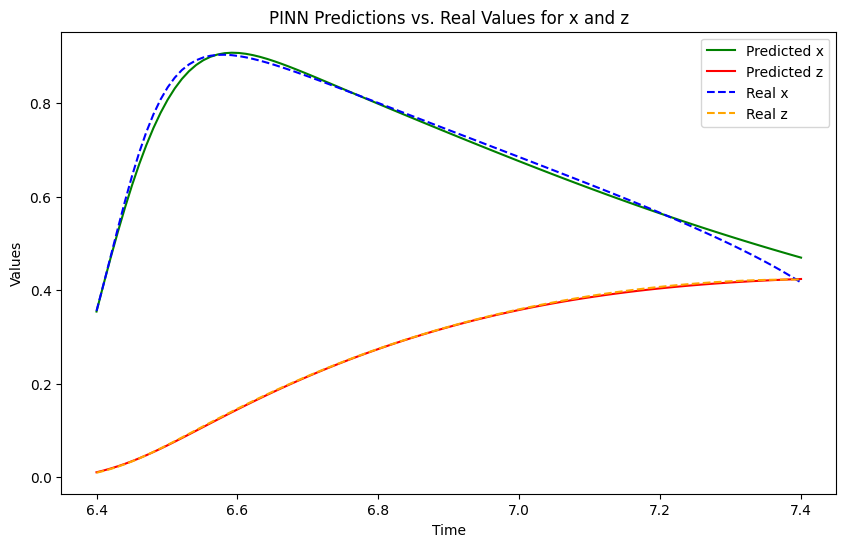

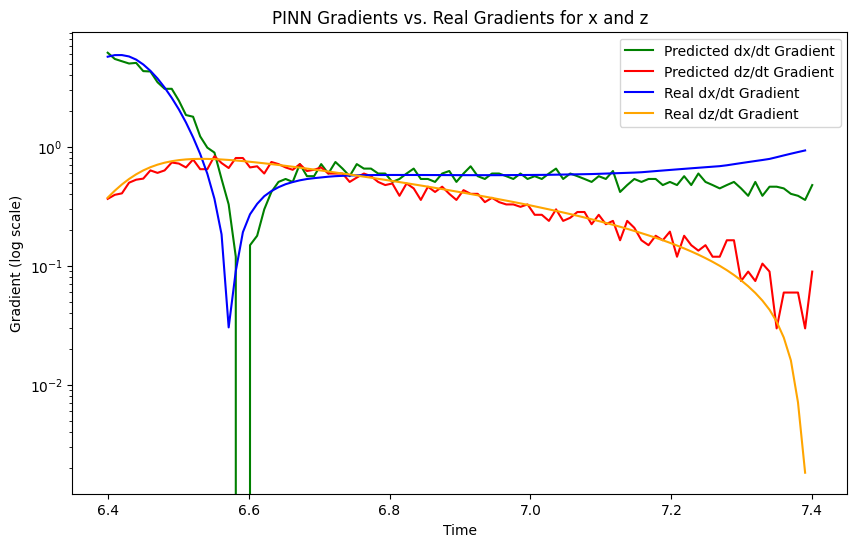

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp


# Define the PINN class
class PINN(nn.Module):
   def __init__(self, hidden_layers=3, hidden_units=20):
       super(PINN, self).__init__()
       layers = [nn.Linear(1, hidden_units), nn.Tanh()]
       for _ in range(hidden_layers):
           layers.append(nn.Linear(hidden_units, hidden_units))
           layers.append(nn.Tanh())
       layers.append(nn.Linear(hidden_units, 2))
       self.model = nn.Sequential(*layers)


   def forward(self, t):
       return self.model(t)


# Physics loss function for PINN
def physics_loss(pinn, t, x, z, epsilon=0.04, q=0.0008, f=2/3):
   x_t = torch.autograd.grad(x.sum(), t, create_graph=True, retain_graph=True)[0]
   z_t = torch.autograd.grad(z.sum(), t, create_graph=True, retain_graph=True)[0]
   residual_x = x_t * epsilon - (x * (1 - x) + f * z * (q - x) / (q + x))
   residual_z = z_t - (x - z)
   return torch.mean(residual_x ** 2) + torch.mean(residual_z ** 2)


# Training function for PINN
def train_pinn(pinn, t_init, initial_conditions, t_span, n_epochs=5000, lr=0.001):
   optimizer = optim.Adam(pinn.parameters(), lr=lr)
   loss_fn = nn.MSELoss()
   loss_history = []


   for epoch in range(n_epochs):
       t = torch.linspace(t_span[0], t_span[1], 100, requires_grad=True).reshape(-1, 1)
       x_pred, z_pred = pinn(t).chunk(2, dim=1)
       boundary_loss = loss_fn(pinn(t_init), initial_conditions)
       phys_loss = physics_loss(pinn, t, x_pred, z_pred)
       total_loss = boundary_loss + phys_loss
       optimizer.zero_grad()
       total_loss.backward()
       optimizer.step()
       loss_history.append(total_loss.item())


       if epoch % 500 == 0:
           print(f"Epoch [{epoch}/{n_epochs}], Loss: {total_loss.item():.8f}")


   return pinn, loss_history


# Initialize and train the PINN model
pinn = PINN(hidden_layers=3, hidden_units=20)
initial_conditions = torch.tensor([[0.355729241909736, 0.00950798977819052]], dtype=torch.float32)
t_init = torch.tensor([[6.4]], dtype=torch.float32)
t_span = (6.4, 7.4)
trained_pinn, loss_history = train_pinn(pinn, t_init, initial_conditions, t_span)


# Generate real values using SciPy's LSODA solver
def bz_reaction(t, y):
   x, z = y
   dx_dt = (1 / 0.04) * (x * (1 - x) + (2 / 3) * z * (0.0008 - x) / (0.0008 + x))  # Adjusted dx/dt
   dz_dt = x - z                             # dz/dt based on BZ system
   return [dx_dt, dz_dt]


# Solve the system using `solve_ivp` with the LSODA method
initial_conditions_real = [0.355729241909736, 0.00950798977819052]
t_eval_real = np.linspace(t_span[0], t_span[1], 100)  # Higher resolution for smooth plotting
sol = solve_ivp(bz_reaction, t_span, initial_conditions_real, method='LSODA', t_eval=t_eval_real)


# Extract the real solution
t_real = sol.t
x_real = sol.y[0]
z_real = sol.y[1]


# Plot the predictions vs. real values
with torch.no_grad():
   t_test = torch.linspace(t_span[0], t_span[1], 100, dtype=torch.float32).reshape(-1, 1)
   x_pred, z_pred = trained_pinn(t_test).chunk(2, dim=1)


plt.figure(figsize=(10, 6))
plt.plot(t_test.numpy(), x_pred.numpy(), label="Predicted x", color="green")
plt.plot(t_test.numpy(), z_pred.numpy(), label="Predicted z", color="red")
plt.plot(t_real, x_real, label="Real x", linestyle="--", color="blue")
plt.plot(t_real, z_real, label="Real z", linestyle="--", color="orange")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.title("PINN Predictions vs. Real Values for x and z")
plt.show()


# Calculate gradients using central difference method
dx_dt_pred = []
dz_dt_pred = []
delta_t = 1e-6  # Small time delta for central difference


for t in t_test:
   t_forward = t + delta_t
   t_backward = t - delta_t


   # Forward and backward predictions for x and z
   x_forward, z_forward = trained_pinn(t_forward.reshape(-1, 1)).chunk(2, dim=1)
   x_backward, z_backward = trained_pinn(t_backward.reshape(-1, 1)).chunk(2, dim=1)


   # Calculate central differences
   dx_dt = (x_forward - x_backward) / (2 * delta_t)
   dz_dt = (z_forward - z_backward) / (2 * delta_t)


   dx_dt_pred.append(dx_dt.item())
   dz_dt_pred.append(dz_dt.item())


# Plot the predicted gradients vs real gradients in log scale
plt.figure(figsize=(10, 6))
plt.semilogy(t_test.numpy(), np.abs(dx_dt_pred), label="Predicted dx/dt Gradient", color="green")
plt.semilogy(t_test.numpy(), np.abs(dz_dt_pred), label="Predicted dz/dt Gradient", color="red")
plt.semilogy(t_real[:-1], np.abs(np.diff(x_real) / np.diff(t_real)), label="Real dx/dt Gradient", color="blue")
plt.semilogy(t_real[:-1], np.abs(np.diff(z_real) / np.diff(t_real)), label="Real dz/dt Gradient", color="orange")
plt.xlabel("Time")
plt.ylabel("Gradient (log scale)")
plt.legend()
plt.title("PINN Gradients vs. Real Gradients for x and z")
plt.show()


# **DIFFUSION EQUATION INVERSE PROBLEM**

Epoch 0, Loss: 19.366823, C: 2.000000
Epoch 1000, Loss: 0.050524, C: 2.046315
Epoch 2000, Loss: 0.036683, C: 1.895374
Epoch 3000, Loss: 0.015396, C: 1.684431
Epoch 4000, Loss: 0.006006, C: 1.459642
Epoch 5000, Loss: 0.001929, C: 1.264049
Epoch 6000, Loss: 0.000532, C: 1.141561
Epoch 7000, Loss: 0.000472, C: 1.079776
Epoch 8000, Loss: 0.000415, C: 1.051444
Epoch 9000, Loss: 0.000325, C: 1.037086
Epoch 10000, Loss: 0.000073, C: 1.028429
Epoch 11000, Loss: 0.000063, C: 1.022483
Epoch 12000, Loss: 0.000047, C: 1.018378
Epoch 13000, Loss: 0.000035, C: 1.015077
Epoch 14000, Loss: 0.000030, C: 1.012579
Epoch 15000, Loss: 0.000131, C: 1.010385
Epoch 16000, Loss: 0.000667, C: 1.008689
Epoch 17000, Loss: 0.000039, C: 1.007394
Epoch 18000, Loss: 0.000080, C: 1.006171
Epoch 19000, Loss: 0.000054, C: 1.005277
Epoch 20000, Loss: 0.000031, C: 1.004448
Epoch 21000, Loss: 0.000085, C: 1.003818
Epoch 22000, Loss: 0.000033, C: 1.003205
Epoch 23000, Loss: 0.000010, C: 1.002721
Epoch 24000, Loss: 0.000046,

/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


L2 Error: 0.003130


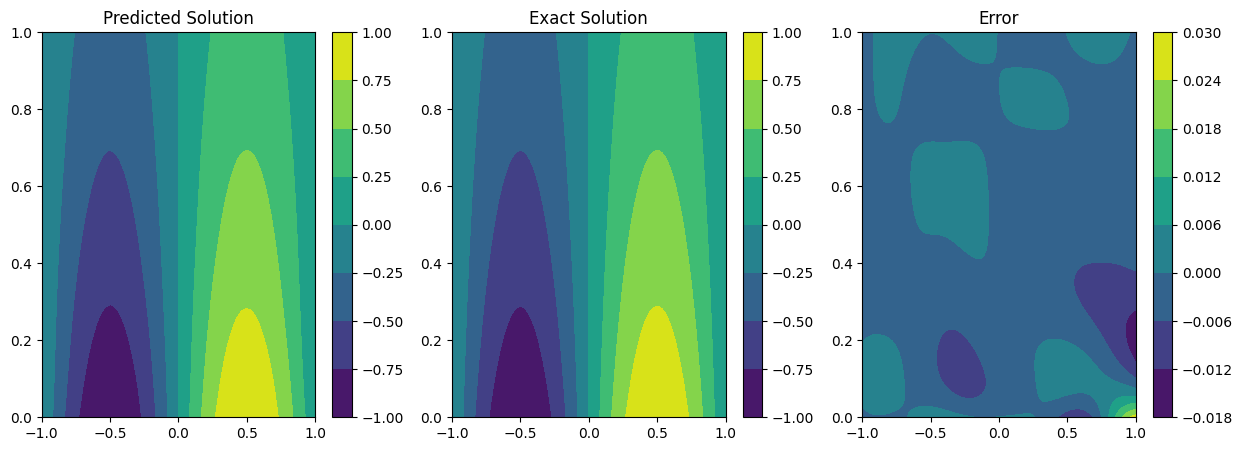

In [8]:
import torch
import torch.nn as nn
import numpy as np
from torch.autograd import grad
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

class PINN(nn.Module):
   def __init__(self, layers=[2, 32, 32, 32, 1]):
       super().__init__()
       self.C = nn.Parameter(torch.tensor([2.0]))

       modules = []
       for i in range(len(layers)-1):
           modules.append(nn.Linear(layers[i], layers[i+1]))
           if i < len(layers)-2:
               modules.append(nn.Tanh())

       self.net = nn.Sequential(*modules)

   def forward(self, x):
       return self.net(x)

   def compute_gradients(self, x, y):
       dy_t = grad(y, x, grad_outputs=torch.ones_like(y),
                  create_graph=True)[0][:, 1:2]

       dy_x = grad(y, x, grad_outputs=torch.ones_like(y),
                  create_graph=True)[0][:, 0:1]

       dy_xx = grad(dy_x, x, grad_outputs=torch.ones_like(dy_x),
                   create_graph=True)[0][:, 0:1]

       return dy_t, dy_xx

   def pde_residual(self, x):
       y = self.forward(x)
       dy_t, dy_xx = self.compute_gradients(x, y)

       source = torch.exp(-x[:, 1:2]) * (torch.sin(np.pi * x[:, 0:1]) -
                                        np.pi**2 * torch.sin(np.pi * x[:, 0:1]))

       return dy_t - self.C * dy_xx + source

def exact_solution(x):
   return np.sin(np.pi * x[:, 0:1]) * np.exp(-x[:, 1:2])

def generate_training_data(num_domain=40, num_boundary=20, num_initial=10):
   x_domain = torch.rand(num_domain, 2) * torch.tensor([2., 1.]) + torch.tensor([-1., 0.])
   x_domain.requires_grad = True

   x_boundary = torch.zeros(num_boundary, 2)
   x_boundary[:, 0] = torch.rand(num_boundary) * 2 - 1
   x_boundary[:, 1] = torch.rand(num_boundary)
   x_boundary.requires_grad = True

   x_initial = torch.zeros(num_initial, 2)
   x_initial[:, 0] = torch.rand(num_initial) * 2 - 1
   x_initial.requires_grad = True

   observe_x = torch.zeros(10, 2)
   observe_x[:, 0] = torch.linspace(-1, 1, 10)
   observe_x[:, 1] = 1
   observe_x.requires_grad = True

   y_boundary = torch.tensor(exact_solution(x_boundary.detach().numpy()))
   y_initial = torch.tensor(exact_solution(x_initial.detach().numpy()))
   y_observe = torch.tensor(exact_solution(observe_x.detach().numpy()))

   return (x_domain, x_boundary, x_initial, observe_x,
           y_boundary, y_initial, y_observe)

def train_model(model, num_epochs=50000, learning_rate=0.001):
   optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

   data = generate_training_data()
   x_domain, x_boundary, x_initial, observe_x, y_boundary, y_initial, y_observe = data

   for epoch in range(num_epochs):
       optimizer.zero_grad()

       pde_loss = torch.mean(model.pde_residual(x_domain)**2)

       bc_loss = torch.mean((model(x_boundary) - y_boundary)**2)
       ic_loss = torch.mean((model(x_initial) - y_initial)**2)
       observe_loss = torch.mean((model(observe_x) - y_observe)**2)

       total_loss = pde_loss + bc_loss + ic_loss + observe_loss

       if epoch % 1000 == 0:
           print(f'Epoch {epoch}, Loss: {total_loss.item():.6f}, C: {model.C.item():.6f}')

       total_loss.backward()
       optimizer.step()

   return model

def evaluate_solution(model):
   x = torch.linspace(-1, 1, 100)
   t = torch.linspace(0, 1, 100)
   X, T = torch.meshgrid(x, t)
   points = torch.stack([X.flatten(), T.flatten()], dim=1)

   with torch.no_grad():
       predicted = model(points).reshape(100, 100)
       exact = torch.tensor(exact_solution(points.numpy())).reshape(100, 100)

   error = torch.mean((predicted - exact)**2).sqrt()
   print(f'L2 Error: {error.item():.6f}')

   plt.figure(figsize=(15, 5))
   plt.subplot(131)
   plt.contourf(X.numpy(), T.numpy(), predicted.numpy())
   plt.colorbar()
   plt.title('Predicted Solution')

   plt.subplot(132)
   plt.contourf(X.numpy(), T.numpy(), exact.numpy())
   plt.colorbar()
   plt.title('Exact Solution')

   plt.subplot(133)
   plt.contourf(X.numpy(), T.numpy(), (predicted - exact).numpy())
   plt.colorbar()
   plt.title('Error')
   plt.show()

model = PINN()
trained_model = train_model(model)
evaluate_solution(trained_model)

# **INVERSE PROBLEM ON BZ REACTION**

Epoch [0/30000]
Loss: 1.49180448
Estimated parameters: ε=0.099000, q=-0.000900, f=0.499000
Epoch [500/30000]
Loss: 0.04134476
Estimated parameters: ε=0.553563, q=-0.000023, f=0.641650
Epoch [1000/30000]
Loss: 0.03031757
Estimated parameters: ε=1.183855, q=0.000047, f=0.724508
Epoch [1500/30000]
Loss: 0.01753035
Estimated parameters: ε=0.352646, q=0.000006, f=1.068106
Epoch [2000/30000]
Loss: 0.00130714
Estimated parameters: ε=0.055742, q=0.070222, f=0.884750
Epoch [2500/30000]
Loss: 0.00073059
Estimated parameters: ε=0.044817, q=0.069011, f=0.852243
Epoch [3000/30000]
Loss: 0.00060018
Estimated parameters: ε=0.042326, q=0.061991, f=0.826813
Epoch [3500/30000]
Loss: 0.00042336
Estimated parameters: ε=0.040691, q=0.052803, f=0.797590
Epoch [4000/30000]
Loss: 0.00033449
Estimated parameters: ε=0.039479, q=0.042168, f=0.766469
Epoch [4500/30000]
Loss: 0.00032714
Estimated parameters: ε=0.038867, q=0.031317, f=0.737238
Epoch [5000/30000]
Loss: 0.00017829
Estimated parameters: ε=0.038886, q=

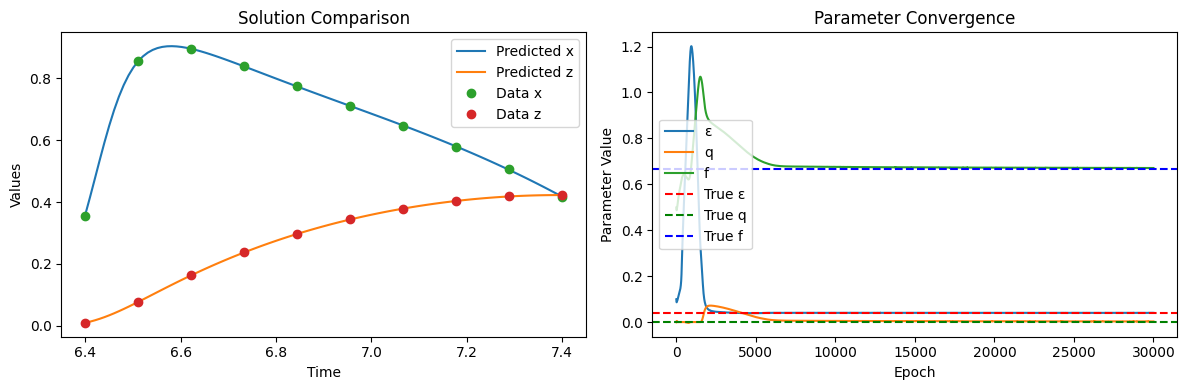


Final Parameter Estimates:
ε (epsilon) = 0.040034 (true: 0.040000)
q = 0.002624 (true: 0.000800)
f = 0.670908 (true: 0.666667)


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp


class InversePINN(nn.Module):
   def __init__(self, hidden_layers=3, hidden_units=20):
       super(InversePINN, self).__init__()
       # Neural network for solution
       layers = [nn.Linear(1, hidden_units), nn.Tanh()]
       for _ in range(hidden_layers):
           layers.append(nn.Linear(hidden_units, hidden_units))
           layers.append(nn.Tanh())
       layers.append(nn.Linear(hidden_units, 2))
       self.solution_net = nn.Sequential(*layers)

       # Learnable parameters (initialized with random guesses)
       self.epsilon = nn.Parameter(torch.tensor([0.1], dtype=torch.float32))
       self.q = nn.Parameter(torch.tensor([0.0001], dtype=torch.float32))
       self.f = nn.Parameter(torch.tensor([0.5], dtype=torch.float32))


   def forward(self, t):
       return self.solution_net(t)


def physics_loss(model, t, x, z):
   # Get current predicted parameter values
   epsilon = torch.abs(model.epsilon)  # Ensure positive
   q = torch.abs(model.q)  # Ensure positive
   f = torch.abs(model.f)  # Ensure positive

   # Calculate derivatives
   x_t = torch.autograd.grad(x.sum(), t, create_graph=True, retain_graph=True)[0]
   z_t = torch.autograd.grad(z.sum(), t, create_graph=True, retain_graph=True)[0]

   # Physics residuals using learned parameters
   residual_x = x_t * epsilon - (x * (1 - x) + f * z * (q - x) / (q + x))
   residual_z = z_t - (x - z)

   return torch.mean(residual_x ** 2) + torch.mean(residual_z ** 2)


def train_inverse_pinn(model, t_data, x_data, z_data, t_span, n_epochs=30000, lr=0.001):
   optimizer = optim.Adam(model.parameters(), lr=lr)
   loss_fn = nn.MSELoss()
   loss_history = []
   param_history = []


   for epoch in range(n_epochs):
       # Forward pass through the network
       t = torch.linspace(t_span[0], t_span[1], 100, requires_grad=True).reshape(-1, 1)
       x_pred, z_pred = model(t).chunk(2, dim=1)

       # Data loss
       output_data = model(t_data)
       x_data_pred, z_data_pred = output_data.chunk(2, dim=1)
       data_loss = loss_fn(x_data_pred, x_data) + loss_fn(z_data_pred, z_data)

       # Physics-informed loss
       phys_loss = physics_loss(model, t, x_pred, z_pred)

       # Total loss
       total_loss = data_loss + phys_loss

       # Backpropagation
       optimizer.zero_grad()
       total_loss.backward()
       optimizer.step()

       # Store loss and parameters
       loss_history.append(total_loss.item())
       param_history.append([model.epsilon.item(), model.q.item(), model.f.item()])

       if epoch % 500 == 0:
           print(f"Epoch [{epoch}/{n_epochs}]")
           print(f"Loss: {total_loss.item():.8f}")
           print(f"Estimated parameters: ε={model.epsilon.item():.6f}, q={model.q.item():.6f}, f={model.f.item():.6f}")


   return model, loss_history, param_history


# Generate synthetic data with known parameters for training
def generate_synthetic_data(t_span, n_points=10):
   def bz_reaction(t, y, epsilon=0.04, q=0.0008, f=2/3):
       x, z = y
       dx_dt = (1/epsilon) * (x * (1 - x) + f * z * (q - x) / (q + x))
       dz_dt = x - z
       return [dx_dt, dz_dt]


   # Generate solution
   t_eval = np.linspace(t_span[0], t_span[1], n_points)
   initial_conditions = [0.355729241909736, 0.00950798977819052]
   sol = solve_ivp(bz_reaction, t_span, initial_conditions, method='LSODA', t_eval=t_eval)

   # Convert to torch tensors
   t_data = torch.tensor(sol.t.reshape(-1, 1), dtype=torch.float32)
   x_data = torch.tensor(sol.y[0].reshape(-1, 1), dtype=torch.float32)
   z_data = torch.tensor(sol.y[1].reshape(-1, 1), dtype=torch.float32)

   return t_data, x_data, z_data


# Main execution
t_span = (6.4, 7.4)
t_data, x_data, z_data = generate_synthetic_data(t_span)


# Initialize and train the inverse PINN
inverse_pinn = InversePINN()
trained_model, loss_history, param_history = train_inverse_pinn(inverse_pinn, t_data, x_data, z_data, t_span)


# Plot results
with torch.no_grad():
   t_test = torch.linspace(t_span[0], t_span[1], 100, dtype=torch.float32).reshape(-1, 1)
   x_pred, z_pred = trained_model(t_test).chunk(2, dim=1)


   # Solution plot
   plt.figure(figsize=(12, 4))
   plt.subplot(1, 2, 1)
   plt.plot(t_test.numpy(), x_pred.numpy(), label="Predicted x")
   plt.plot(t_test.numpy(), z_pred.numpy(), label="Predicted z")
   plt.plot(t_data.numpy(), x_data.numpy(), 'o', label="Data x")
   plt.plot(t_data.numpy(), z_data.numpy(), 'o', label="Data z")
   plt.xlabel("Time")
   plt.ylabel("Values")
   plt.legend()
   plt.title("Solution Comparison")


   # Parameter convergence plot
   param_history = np.array(param_history)
   plt.subplot(1, 2, 2)
   plt.plot(param_history[:, 0], label='ε')
   plt.plot(param_history[:, 1], label='q')
   plt.plot(param_history[:, 2], label='f')
   plt.axhline(y=0.04, color='r', linestyle='--', label='True ε')
   plt.axhline(y=0.0008, color='g', linestyle='--', label='True q')
   plt.axhline(y=2/3, color='b', linestyle='--', label='True f')
   plt.xlabel("Epoch")
   plt.ylabel("Parameter Value")
   plt.legend()
   plt.title("Parameter Convergence")

   plt.tight_layout()
   plt.show()


# Print final parameter estimates
print("\nFinal Parameter Estimates:")
print(f"ε (epsilon) = {trained_model.epsilon.item():.6f} (true: 0.040000)")
print(f"q = {trained_model.q.item():.6f} (true: 0.000800)")
print(f"f = {trained_model.f.item():.6f} (true: 0.666667)")